# CSC17104 – LẬP TRÌNH KHOA HỌC DỮ LIỆU
# ĐỒ ÁN CUỐI KỲ: **Data Science Salaries 2023**

---

## **GVHD:** Phạm Trọng Nghĩa - Lê Nhựt Nam - Nguyễn Thanh Tình

## **Thành viên nhóm:**
- 23122011 - Đoàn Hải Nam
- 23122014 - Hoàng Minh Trung
- 23122036 - Nguyển Ngọc Khoa

---

# **1. Thu thập dữ liệu**

### Chủ đề dữ liệu là gì?
- Bộ dữ liệu nói về mức lương của các vị trí công việc thuộc lĩnh vực Data Science và các lĩnh vực liên quan (Data Analyst, Data Engineer, Machine Learning Engineer, AI Engineer,…). Nó ghi nhận các yếu tố ảnh hưởng đến lương như kinh nghiệm, chức danh, loại hình làm việc, mức độ làm việc từ xa, vị trí công ty và quy mô công ty.
- **Bối cảnh:** Bộ dữ liệu phản ánh thực tế thị trường việc làm Data Science toàn cầu trong giai đoạn 2020–2023, đặc biệt là sự bùng nổ của làm việc từ xa sau đại dịch COVID-19, sự chênh lệch lương mạnh mẽ giữa các khu vực địa lý (đặc biệt Mỹ so với phần còn lại của thế giới), và xu hướng trả lương cao hơn ở các công ty lớn hoặc các vị trí senior/executive.

### Nguồn dữ liệu là gì?
- **Nguồn dữ liệu**: Kaggle – [Data Science Salaries 2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data)
- **Tác giả gốc**: [randomarnab](https://www.kaggle.com/arnabchaki)
- **Ngày xuất bản**: Được đăng tải trên Kaggle vào năm 2023 (dữ liệu lương trải dài từ 2020 đến 2023).

### Dữ liệu này có được cấp phép để sử dụng không?
- Bố dữ liệu có giấy phép: [Open Data Commons Attribution License v1.0 (ODC-By)](https://opendatacommons.org/licenses/dbcl/1-0/)
- Theo giấy phép, ta hoàn toàn được phép sử dụng cho mục đích học tập, nghiên cứu, thương mại,… miễn là ghi nguồn đầy đủ.

### Dữ liệu này được thu thập như thế nào?
- **Phương pháp thu thập**: Chủ yếu thu thập bằng phương pháp web scraping từ các trang web công khai về lương (như Levels.fyi, Glassdoor, và một số job board khác), có thể kết hợp dữ liệu crowdsourced.
- **Dân số mục tiêu và phương pháp lấy mẫu**: Dân số mục tiêu là những người làm việc trong lĩnh vực data toàn cầu. Phương pháp lấy mẫu là convenience sampling/opportunistic (lấy dữ liệu có sẵn công khai), không phải random sampling.
- **Khoảng thời gian thu thập dữ liệu**: Ghi nhận lương của các năm 2020, 2021, 2022 và 2023.
- **Bất kỳ hạn chế hoặc sai lệch nào đã biết trong quá trình thu thập**:
  - Thiên mạnh về dữ liệu từ Mỹ và các nước phát triển, ít dữ liệu từ châu Á, châu Phi, Mỹ Latinh.
  - Người có lương cao thường sẵn lòng công khai hơn → có khả năng bị bias lên cao (inflated salary).
  - Không có thông tin cá nhân (tuổi, giới tính, dân tộc) để bảo vệ quyền riêng tư.
  - Một số vị trí công việc rất niche hoặc ở công ty nhỏ/startup có thể không xuất hiện.

### Tại sao chọn bộ dữ liệu này?
- Nhóm chúng em đều đang học và định hướng theo ngành Data Science/AI nên rất quan tâm đến thực tế lương thưởng, sự khác biệt giữa các vị trí, ảnh hưởng của làm remote và vị trí địa lý tới thu nhập. Đây là chủ đề rất thực tế và gần gũi với sự nghiệp tương lai của cả nhóm.

- **Dữ liệu này có thể cung cấp những câu hỏi hoặc thông tin chi tiết tiềm năng như:**
  - Mức lương trung bình của Data Scientist là bao nhiêu? Xu hướng tăng lương qua các năm ra sao?
  - Làm remote 100% có thực sự giúp người ở các nước lương thấp tiếp cận mức lương cao hơn không?
  - Chức danh nào (Data Scientist, ML Engineer, Data Engineer,…) có mức lương cao nhất khi cùng level kinh nghiệm?
  - Quy mô công ty (S/M/L) ảnh hưởng thế nào đến lương khi kiểm soát các yếu tố khác?
  - Có thể xây dựng mô hình dự đoán lương dựa trên kinh nghiệm, vị trí, loại hình làm việc không?

In [1]:
# Import các thư viện cần thiết
import sys
import os
import numpy as np

# Import các module từ /src
sys.path.append(os.path.abspath('src'))
from src import data_processing as dp
from src import visualization as vis

# Thiết lập autoreload để tự động tải lại các thay đổi trong /src
%load_ext autoreload
%autoreload 2

# Tải tập dữ liệu
df = dp.load_data('data/raw/ds_salaries.csv')
df.head()

Successfully loaded data from data/raw/ds_salaries.csv


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


---

# **2. Khám phá dữ liệu**

## **2.1. Tổng quan về tập dữ liệu**

### **Thông tin cơ bản**
*   Số lượng dòng: 3755
*   Số lượng cột: 11
*   Mỗi dòng đại diện cho một bản ghi mô tả mức lương của một nhân sự làm việc trong lĩnh vực Data Science. Bao gồm các thông tin về **cấp độ kinh nghiệm, loại hợp đồng, chức danh công việc, mức lương (cả tiền gốc và USD), quốc gia cư trú, tỷ lệ làm việc từ xa, quốc gia công ty và quy mô công ty**. Nói cách khác, mỗi dòng là một bản ghi mô tả **mức lương và điều kiện làm việc của một cá nhân cụ thể** trong ngành Data Science.

*   Kích thước tổng thể: ~1.72 MB

In [2]:
print(f"Dữ liệu có: {df.shape[0]} hàng, {df.shape[1]} cột")
print(f"Kích thước tổng thể: {df.memory_usage(deep=True).sum() / 1e6:.2f} MB")

Dữ liệu có: 3755 hàng, 11 cột
Kích thước tổng thể: 1.51 MB


### **Tính toàn vẹn dữ liệu**
*   Số  hàng trùng lặp: 1171
*   Các hàng trống: 0
*   Các hàng trùng lặp **nên được loại bỏ**.

    Tổng cộng 1.171 bản ghi trùng xuất hiện dưới dạng các dòng **giống hệt nhau trên toàn bộ các thuộc tính**, những bản ghi này thực chất mô tả **cùng một quan sát** được ghi nhận nhiều lần và **không mang thêm thông tin mới**.

    Việc giữ những bản ghi này sẽ khiến dataset bị **lệch phân phối**, làm sai kết quả thống kê và gây **overfitting** cho mô hình dự báo. Mặc dù tỷ lệ trùng lặp khá cao (khoảng **31%**), việc loại bỏ chúng là cần thiết để đảm bảo dữ liệu **sạch, không thiên lệch**, và phản ánh chính xác phân bố thực tế.


In [3]:
duplicates = df.duplicated().sum()
print(f"Số hàng trùng lặp: {duplicates}")

empty_rows = df.isnull().all(axis=1).sum()
print(f"Số hàng trống: {empty_rows}")

Số hàng trùng lặp: 1171
Số hàng trống: 0


In [4]:
df = df.drop_duplicates()
print(f"Sau khi loại bỏ các hàng trùng lặp: {df.shape[0]} hàng, {df.shape[1]} cột")

Sau khi loại bỏ các hàng trùng lặp: 2584 hàng, 11 cột


### **Danh sách các cột**

**Thông tin mỗi cột:**

* **work_year**: Năm mà mức lương được trả.
* **experience_level**: Cấp độ kinh nghiệm của nhân viên trong năm làm việc.
* **employment_type**: Loại hình hợp đồng lao động cho vị trí đó.
* **job_title**: Chức danh công việc trong năm được ghi nhận.
* **salary**: Tổng mức lương được trả trước thuế (đơn vị tiền tệ gốc).
* **salary_currency**: Loại tiền tệ được trả lương theo mã ISO 4217.
* **salary_in_usd**: Mức lương đã được quy đổi sang USD.
* **employee_residence**: Quốc gia nơi nhân viên cư trú trong năm làm việc (theo mã ISO 3166).
* **remote_ratio**: Tỷ lệ phần trăm công việc được thực hiện từ xa.
* **company_location**: Quốc gia nơi đặt trụ sở chính hoặc chi nhánh của công ty.
* **company_size**: Quy mô công ty (số lượng nhân viên trung bình trong năm).

**Các cột liên quan đến phân tích tiềm năng:**

**Các cột nên bị loại bỏ**

### **Các kiểu dữ liệu**
*   Kiểu dữ liệu hiện tại của từng cột:

In [5]:
# Kiểm tra kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


Dựa trên **thông tin mỗi cột** thì không có cột nào có kiểu dữ liệu bất thường cần phải chuyển đổi.

### 🔄 Tiền xử lý dữ liệu (Preprocessing)
Trước khi đi vào phân tích chi tiết, chúng ta cần thực hiện các bước chuẩn hóa dữ liệu sau:
1.  **Mapping giá trị:** Chuyển đổi các mã viết tắt (ví dụ: 'EN', 'PT', 'US') sang tên đầy đủ (ví dụ: 'Entry-level', 'Part-time', 'United States') để biểu đồ trực quan và dễ hiểu hơn.
2.  **Gom nhóm Job Title:** Vì dataset có tới 93 chức danh công việc khác nhau (High Cardinality), việc phân tích từng chức danh sẽ rất rối. Chúng ta sẽ gom chúng về 6 nhóm chức năng chính:
    * **Data Scientist:** Các vị trí liên quan đến mô hình hóa, toán học.
    * **Data Engineer:** Các vị trí xây dựng pipeline, hạ tầng dữ liệu.
    * **Data Analyst:** Các vị trí phân tích, trực quan hóa.
    * **Machine Learning Engineer:** Các vị trí chuyên sâu về triển khai ML/AI.
    * **Manager/Lead:** Các vị trí quản lý cấp cao.
    * **Other:** Các vị trí còn lại.

In [6]:
import country_converter as coco
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mapping các giá trị viết tắt sang đầy đủ
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior Level',
    'EN': 'Entry Level',
    'EX': 'Executive Level',
    'MI': 'Mid Level'
})

df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelance',
    'CT': 'Contractor',
    'FT': 'Full-time',
    'PT': 'Part-time'
})

df['company_size'] = df['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

# df['remote_ratio'] = df['remote_ratio'].replace({
#     0: 'On-Site',
#     50: 'Hybrid',
#     100: 'Remote'
# })

# 2. Chuyển đổi mã quốc gia sang tên quốc gia (ISO3 -> Name)
# Lưu ý: Cần cài đặt library country_converter
cc = coco.CountryConverter()
df['company_location'] = cc.convert(names=df['company_location'], to='name_short')
df['employee_residence'] = cc.convert(names=df['employee_residence'], to='name_short')

# 3. Hàm gom nhóm Job Title (Feature Engineering)
def assign_job_category(job_title):
    job_title = job_title.lower()
    if 'manager' in job_title or 'head' in job_title or 'lead' in job_title or 'director' in job_title or 'principal' in job_title:
        return 'Manager/Lead'
    elif 'data scientist' in job_title or 'scientist' in job_title:
        return 'Data Scientist'
    elif 'data engineer' in job_title or 'engineer' in job_title or 'architect' in job_title:
        return 'Data Engineer'
    elif 'analyst' in job_title:
        return 'Data Analyst'
    elif 'machine learning' in job_title or 'ml' in job_title or 'ai' in job_title:
        return 'ML/AI Engineer'
    else:
        return 'Other'

# Tạo cột mới job_category
df['job_category'] = df['job_title'].apply(assign_job_category)

# Kiểm tra kết quả sau khi xử lý
print("Các nhóm công việc đã tạo:")
print(df['job_category'].value_counts())
df.head()

Các nhóm công việc đã tạo:
job_category
Data Engineer     1150
Data Scientist     700
Data Analyst       459
Manager/Lead       180
Other               70
ML/AI Engineer      25
Name: count, dtype: int64


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior Level,Full-time,Principal Data Scientist,80000,EUR,85847,Spain,100,Spain,Large,Manager/Lead
1,2023,Mid Level,Contractor,ML Engineer,30000,USD,30000,United States,100,United States,Small,Data Engineer
2,2023,Mid Level,Contractor,ML Engineer,25500,USD,25500,United States,100,United States,Small,Data Engineer
3,2023,Senior Level,Full-time,Data Scientist,175000,USD,175000,Canada,100,Canada,Medium,Data Scientist
4,2023,Senior Level,Full-time,Data Scientist,120000,USD,120000,Canada,100,Canada,Medium,Data Scientist


## **2.2. Phân tích các cột số (Numerical Columns)**

**Xác định các cột số:**

In [7]:
# Liệt kê các cột phân loại dựa trên dtype object
cat_cols = df.select_dtypes(include=['int64']).columns.tolist()

print("Danh sách các cột số:")
print(cat_cols)

Danh sách các cột số:
['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


### **work_year**

--- Metrics for: work_year ---

[1] Distribution & Central Tendency:
   - Mean: 2022.30
   - Median: 2022.00
   - Std Dev: 0.75
   - Skewness: -0.97 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Range & Outliers:
   - Min: 2020
   - Max: 2023
   - IQR: 1.00 (Q1=2022.00, Q3=2023.00)
   - Outlier Boundaries: [2020.50, 2024.50]
   - Outlier Count: 75 (2.90%)

[3] Data Quality:
   - Missing Values: 0 (0.00%)
   - Unique Values (4): [2020, 2021, 2022, 2023]
----------------------------------------


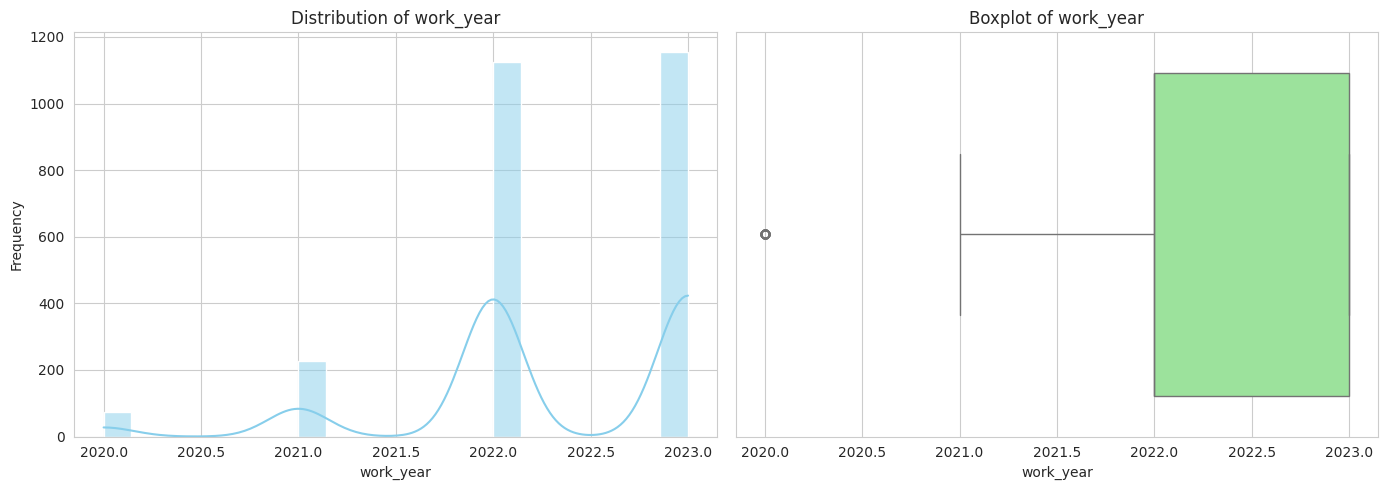

In [8]:
# Phân tích và vẽ biểu đồ work_year
dp.analyze_numerical_column_metrics(df, 'work_year')
vis.plot_column_distribution(df, 'work_year')

**Phân bố dữ liệu:** Dữ liệu **tập trung mạnh vào 2022-2023** (~90% tổng số), trong khi 2020-2021 chỉ chiếm ~10%. Điều này phản ánh cột bị mất cân bằng và nghiêng về thị trường việc làm giai đoạn gần đây.

**Xu hướng:** Số lượng bản ghi **tăng mạnh theo năm** (2020: 75 $\rightarrow$ 2023: 1,150), cho thấy ngành Data Science phát triển nhanh hoặc nguồn dữ liệu được mở rộng.

**Đặc điểm thống kê:**
- **Skewness = -0.97** (lệch trái): xác nhận dữ liệu tập trung ở các năm mới
- **75 outliers (2.90%)**: toàn bộ là dữ liệu năm 2020 do số lượng quá ít

**Chất lượng dữ liệu:** Dữ liệu **sạch và nhất quán** - không có giá trị thiếu và cũng không có giá trị nào bất thường. Chỉ 4 giá trị duy nhất (2020-2023).

### **salary**

--- Metrics for: salary ---

[1] Distribution & Central Tendency:
   - Mean: 210365.30
   - Median: 134630.00
   - Std Dev: 808037.54
   - Skewness: 24.09 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Range & Outliers:
   - Min: 6000
   - Max: 30400000
   - IQR: 92562.50 (Q1=90000.00, Q3=182562.50)
   - Outlier Boundaries: [-48843.75, 321406.25]
   - Outlier Count: 95 (3.68%)

[3] Data Quality:
   - Missing Values: 0 (0.00%)
----------------------------------------


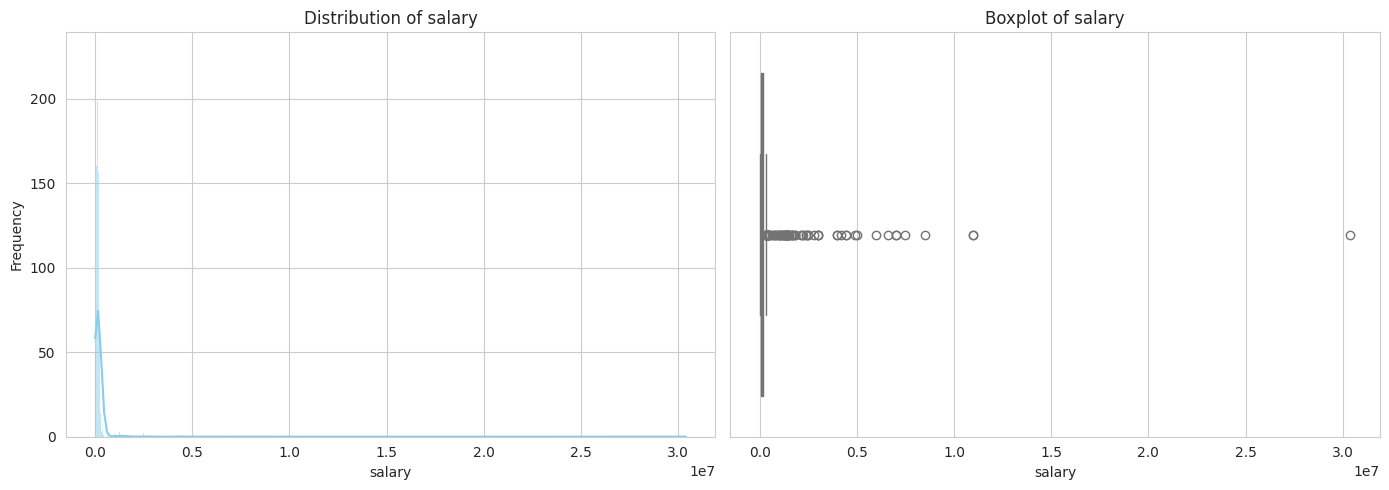

In [9]:
# Analyze and Visualize salary
dp.analyze_numerical_column_metrics(df, 'salary')
vis.plot_column_distribution(df, 'salary')

In [10]:
print("Checking impossible values:")
print(f"salary < 0: {np.sum(df['salary'] < 0)}")

Checking impossible values:
salary < 0: 0


**Phân bố dữ liệu:**
Dữ liệu có **phân bố lệch phải cực mạnh** (skewness = 24.09), tập trung chủ yếu ở khoảng **dưới 500K**, trong khi có một số ít giá trị cực cao (lên đến 30.4M). Đây là đặc trưng điển hình của dữ liệu lương.

**Xu hướng trung tâm:**

* **Mean (210K) >> Median (134K)**: chênh lệch lớn do outliers kéo trung bình lên cao
* **Median = 134K** phản ánh mức lương "điển hình" chính xác hơn
* **Độ phân tán rất cao** (Std Dev = 808K): mức lương có sự chênh lệch lớn giữa các vị trí/công ty

**Khoảng giá trị & Outliers:**

* **Khoảng lương**: 6K - 30.4M (chênh lệch ~5,000 lần!)
* **95 outliers (3.68%)**: các mức lương > 321K, có thể là C-level, vai trò đặc biệt hoặc **lỗi dữ liệu** (30.4M là bất thường)
* **IQR = 92.5K** (Q1=90K, Q3=182.5K): 50% dữ liệu nằm trong khoảng hẹp này

**Chất lượng dữ liệu:**

* **Không có giá trị thiếu** và không có lương âm
* **Cần kiểm tra outliers**: giá trị 30.4M có thể là lỗi nhập liệu (nhầm đơn vị tiền tệ, thêm số 0)

**Khuyến nghị**

* **Sử dụng Median** thay vì Mean cho phân tích tổng quan
* **Xử lý outliers**: xem xét loại bỏ hoặc điều tra các giá trị > 1M
* **Phân tích theo nhóm**: phân chia theo experience_level, job_title để hiểu rõ sự chênh lệch
* **Chuẩn hóa dữ liệu**: xem xét log transformation để phân tích mô hình

### **salary_in_usd**

--- Metrics for: salary_in_usd ---

[1] Distribution & Central Tendency:
   - Mean: 133409.28
   - Median: 130000.00
   - Std Dev: 67136.84
   - Skewness: 0.62 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Range & Outliers:
   - Min: 5132
   - Max: 450000
   - IQR: 90025.00 (Q1=84975.00, Q3=175000.00)
   - Outlier Boundaries: [-50062.50, 310037.50]
   - Outlier Count: 29 (1.12%)

[3] Data Quality:
   - Missing Values: 0 (0.00%)
----------------------------------------


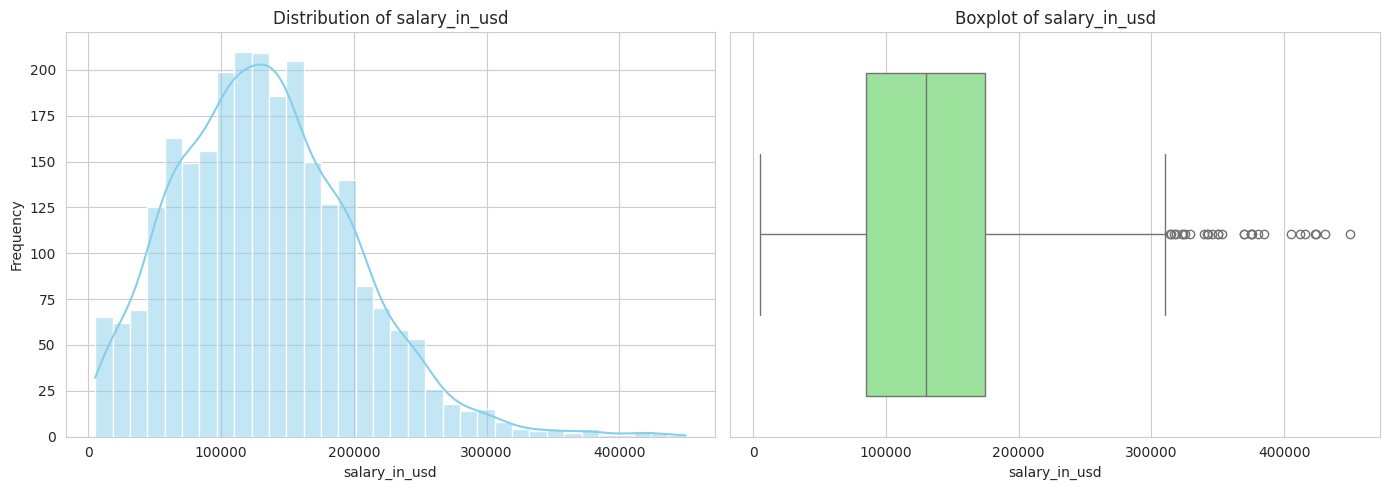

In [11]:
# Analyze and Visualize salary_in_usd
dp.analyze_numerical_column_metrics(df, 'salary_in_usd')
vis.plot_column_distribution(df, 'salary_in_usd')

Vẽ biểu đồ phân phối kết hợp Boxplot phía trên

In [12]:
# import plotly.figure_factory as ff

# # Tạo histogram với đường KDE
# fig = ff.create_distplot([df['salary_in_usd']], ['Salary Distribution'], show_hist=True, show_rug=False)
# fig.update_layout(title='Phân phối Mức lương (USD) kèm đường mật độ xác suất (KDE)')
# fig.show()

# # Tính toán các chỉ số thống kê cơ bản
# print(df['salary_in_usd'].describe())

In [13]:
print("Checking impossible values:")
print(f"salary_in_usd < 0: {np.sum(df['salary_in_usd'] < 0)}")

Checking impossible values:
salary_in_usd < 0: 0


**Phân bố dữ liệu:**
Dữ liệu có **phân bố gần chuẩn với lệch phải nhẹ** (skewness = 0.62), tập trung chủ yếu ở khoảng **100K-200K USD**. Đây là phân bố **hợp lý và đại diện** cho thị trường lương Data Science toàn cầu.

**Xu hướng trung tâm:**

* **Mean (133K) ≈ Median (130K)**: chênh lệch nhỏ cho thấy dữ liệu cân đối hơn nhiều so với cột `salary` gốc
* **Std Dev = 67K**: độ biến động vừa phải, phản ánh sự chênh lệch tự nhiên theo kinh nghiệm và vị trí
* Mức lương trung bình **130K USD** là con số thực tế cho ngành Data Science

**Khoảng giá trị & Outliers:**

* **Khoảng lương**: 5K - 450K (khoảng hợp lý hơn nhiều so với cột `salary`)
* **Chỉ 29 outliers (1.12%)**: giảm đáng kể từ 3.68%, cho thấy việc quy đổi USD đã **chuẩn hóa tốt** dữ liệu
* **IQR = 90K** (Q1=85K, Q3=175K): 50% dữ liệu nằm trong khoảng hợp lý

**So sánh với cột salary:**

* **Phân bố ổn định hơn**: skewness giảm từ 24.09 xuống 0.62
* **Ít outliers hơn**: từ 95 xuống 29 điểm
* **Loại bỏ nhiễu tiền tệ**: không còn giá trị bất thường như 30.4M

**Chất lượng dữ liệu:**

* **Không có giá trị thiếu** và không có lương âm
* **Dữ liệu đã được làm sạch tốt** thông qua quy đổi USD

### **remote_ratio**

--- Metrics for: remote_ratio ---

[1] Distribution & Central Tendency:
   - Mean: 50.48
   - Median: 50.00
   - Std Dev: 48.16
   - Skewness: -0.02 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Range & Outliers:
   - Min: 0
   - Max: 100
   - IQR: 100.00 (Q1=0.00, Q3=100.00)
   - Outlier Boundaries: [-150.00, 250.00]
   - Outlier Count: 0 (0.00%)

[3] Data Quality:
   - Missing Values: 0 (0.00%)
   - Unique Values (3): [0, 50, 100]
----------------------------------------


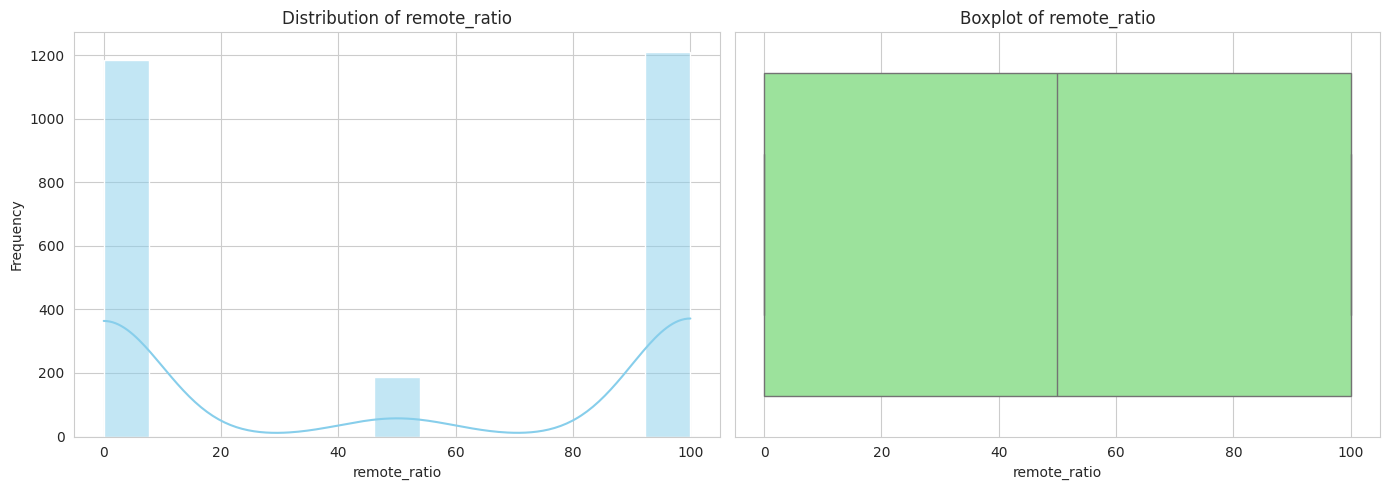

In [14]:
# Analyze and Visualize remote_ratio
dp.analyze_numerical_column_metrics(df, 'remote_ratio')
vis.plot_column_distribution(df, 'remote_ratio')

**Phân bố dữ liệu**
Dữ liệu có **phân bố hai cực (bimodal)** với 3 giá trị duy nhất: **0, 50, 100**. Tập trung chủ yếu ở hai đầu cực (0% và 100% remote), trong khi 50% chiếm tỷ lệ thấp hơn nhiều.

**Đặc điểm phân bố**

* **Skewness ≈ 0** (-0.02): phân bố gần như đối xứng hoàn hảo
* **Mean = Median = 50**: xác nhận tính đối xứng, nhưng **không phản ánh xu hướng thực tế** do dữ liệu tập trung ở hai cực
* **IQR = 100** (Q1=0, Q3=100): 50% dữ liệu nằm ở hai biên, cho thấy **phân hóa rõ rệt** giữa onsite và remote

**Xu hướng làm việc**
Biểu đồ cho thấy thị trường **phân hóa mạnh**:

* **~1,200 công việc 100% remote**: xu hướng làm việc từ xa phổ biến
* **~1,180 công việc 0% remote**: vẫn có nhu cầu cao làm việc tại văn phòng
* **~200 công việc hybrid (50%)**: mô hình kết hợp ít phổ biến hơn

**Chất lượng dữ liệu**

* **Không có giá trị thiếu** và không có outliers
* **Dữ liệu rời rạc**: chỉ 3 giá trị (0, 50, 100) - phù hợp với cách phân loại thực tế
* **Khoảng hợp lý**: từ 0-100

### 🔎 Phân tích và Xử lý Ngoại lai (Outliers Detection)
Dữ liệu lương thường có xu hướng lệch phải (right-skewed). Chúng ta sẽ sử dụng phương pháp **IQR (Interquartile Range)** để xác định các giá trị ngoại lai.
* **Quyết định:** Chúng ta sẽ **không xóa** các outliers là những vị trí Executive lương cao (vì đây là dữ liệu thật), nhưng sẽ xem xét loại bỏ những dữ liệu nhiễu (nếu có lương quá thấp hoặc quá cao một cách vô lý).

In [15]:
# Tính toán IQR
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
print(f"Số lượng ngoại lai phát hiện được: {len(outliers)}")
print(f"Ngưỡng dưới: {lower_bound} | Ngưỡng trên: {upper_bound}")

# Hiển thị một số dòng ngoại lai để kiểm tra
outliers.sort_values(by='salary_in_usd', ascending=False).head(5)

Số lượng ngoại lai phát hiện được: 29
Ngưỡng dưới: -50062.5 | Ngưỡng trên: 310037.5


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
3522,2020,Mid Level,Full-time,Research Scientist,450000,USD,450000,United States,0,United States,Medium,Data Scientist
2011,2022,Mid Level,Full-time,Data Analyst,350000,GBP,430967,United Kingdom,0,United Kingdom,Medium,Data Analyst
528,2023,Senior Level,Full-time,AI Scientist,1500000,ILS,423834,Israel,0,Israel,Large,Data Scientist
3747,2021,Mid Level,Full-time,Applied Machine Learning Scientist,423000,USD,423000,United States,50,United States,Large,Data Scientist
3675,2021,Executive Level,Contractor,Principal Data Scientist,416000,USD,416000,United States,100,United States,Small,Manager/Lead


## **2.3. Phân tích các cột phân loại (Categorical Columns)**


**Xác định danh sách các cột phân loại dựa trên kiểu dữ liệu:**

In [16]:
# Liệt kê các cột phân loại dựa trên dtype object
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Danh sách các cột phân loại:")
print(cat_cols)

Danh sách các cột phân loại:
['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size', 'job_category']


**Kiểm tra số lượng giá trị khác nhau trong mỗi cột:**

In [17]:
# Kiểm tra số lượng giá trị duy nhất cho từng cột phân loại
print("\nSố lượng giá trị khác nhau trong mỗi cột:")
df[cat_cols].nunique().sort_values()


Số lượng giá trị khác nhau trong mỗi cột:


company_size           3
experience_level       4
employment_type        4
job_category           6
salary_currency       20
company_location      72
employee_residence    78
job_title             93
dtype: int64

Kết quả cho thấy chúng ta có tổng cộng **7 cột phân loại**, bao gồm thông tin về cấp độ kinh nghiệm, loại hợp đồng, chức danh công việc, quốc gia cư trú, vị trí công ty và quy mô công ty.

Dựa trên số lượng giá trị duy nhất:
- Các cột `company_size`, `experience_level`, `employment_type` có **ít giá trị phân loại** → thuộc nhóm **low-cardinality**. Những cột này dễ xử lý và thuận lợi cho trực quan hóa.
- Các cột như `salary_currency` có mức độ đa dạng trung bình (20 giá trị).
- Các cột như `company_location` và `employee_residence` có số lượng phân loại **rất lớn (72–78)** → thuộc nhóm **high-cardinality**, cần cẩn trọng khi trực quan và mã hóa.
- Đặc biệt, `job_title` có **93 giá trị**, là cột có độ đa dạng cao nhất. Việc trực quan tất cả job title có thể gây nhiễu, nên cần giới hạn theo nhóm phổ biến nhất (top 10 hoặc top 20).


**Thống kê tần suất xuất hiện**

In [18]:
# Số lượng của từng loại trong mỗi category column
for col in cat_cols:
    print("="*50)
    print(f"Value counts for: {col}")
    print(df[col].value_counts())

Value counts for: experience_level
experience_level
Senior Level       1554
Mid Level           664
Entry Level         270
Executive Level      96
Name: count, dtype: int64
Value counts for: employment_type
employment_type
Full-time     2547
Part-time       17
Contractor      10
Freelance       10
Name: count, dtype: int64
Value counts for: job_title
job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64
Value counts for: salary_currency
salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS  

Dựa trên thống kê tần suất xuất hiện, chúng ta có thể đánh giá rõ hơn về cấu trúc của các biến phân loại trong bộ dữ liệu.

---

`experience_level`

Phân phối cấp độ kinh nghiệm cho thấy:
- **SE (Senior)** chiếm áp đảo với 2,516 mẫu.
- **MI (Mid-level)** đứng thứ hai với 805 mẫu.
- **EN (Entry)** chỉ chiếm 320 mẫu.
- **EX (Executive)** là nhóm hiếm, chỉ 114 mẫu.

Điều này phản ánh rằng dataset thiên nhiều về các vị trí senior, điều có thể ảnh hưởng đến phân tích mức lương chung (salary skewness).  
Nhóm EX quá ít, có thể xem xét gom nhóm khi mô hình hóa.

---

`employment_type`

Tần suất loại hợp đồng:
- **FT – Full-time** chiếm gần như toàn bộ (3,718 mẫu) → >97%.
- Các loại PT (part-time), CT (contract), FL (freelance) cực kỳ ít.

Điều này có nghĩa là:
- Phân tích dựa trên loại hợp đồng sẽ không có nhiều ý nghĩa vì dữ liệu lệch mạnh.
- Khi trực quan hóa, chỉ nên hiển thị FT và gom các loại khác thành “Other”.

---

`job_title`

Có tổng cộng **93 job titles**, với sự phân bố rất lệch:
- 3 vị trí phổ biến nhất:
  - Data Engineer – 1,040 mẫu  
  - Data Scientist – 840 mẫu  
  - Data Analyst – 612 mẫu  
- Phần lớn job title còn lại chỉ có vài mẫu, thậm chí chỉ **1 mẫu**.

Kết luận:
- Đây là một biến **high-cardinality**.
- Trực quan hóa toàn bộ là không khả thi.
- Trong EDA, nên chọn **top 10 hoặc top 15 job titles** để phân tích sâu hơn.
- Khi mô hình hóa, có thể cần chuẩn hóa hoặc gom nhóm theo category lớn (ví dụ: "Data Analyst roles", "Engineer roles").

---

`salary_currency`

Loại tiền tệ:
- **USD chiếm 3,224 mẫu** (áp đảo).
- EUR, GBP là hai nhóm lớn tiếp theo.
- Các currency khác chỉ xuất hiện vài lần.

Vấn đề EDA:
- Không cần phân tích sâu vì ta đã có cột `salary_in_usd`.
- Dữ liệu currency skew → không thích hợp cho biểu đồ bar full.

---

`employee_residence` và `company_location`

Cả hai cột đều có lượng phân loại rất cao:
- 78 quốc gia cư trú  
- 72 quốc gia đặt công ty  

Trong cả hai:
- **US chiếm hơn 50% dữ liệu**.
- GB, CA, ES, IN chiếm phần nhỏ.
- Phần lớn quốc gia còn lại chỉ có 1–3 mẫu.

Kết luận:
- Đây là nhóm **high-cardinality** → cần chọn top N để trực quan.
- Trực quan hóa phù hợp nhất: **Top 10 hoặc Top 15 country distribution**.

---

`company_size`

Ba phân loại:
- M (medium) → 3,153 mẫu (đa số)
- L (large) → 454 mẫu
- S (small) → 148 mẫu

Rất rõ ràng: phần lớn công ty trong dataset thuộc quy mô trung bình.

---

**Tóm tắt:**

- Một số cột có phân phối lệch mạnh (employment_type, company_size).
- Một số cột có cardinality rất cao (job_title, residence, company location).
- EDA tiếp theo nên:
  - Trực quan hóa các biến có cardinality thấp (bar chart trực tiếp).
  - Với các biến có cardinality cao → chỉ dùng **top N**.
  - Kiểm tra quan hệ giữa từng biến và `salary_in_usd`.

Tiếp theo, chúng ta sẽ tạo trực quan hóa để nắm bắt phân phối rõ hơn.

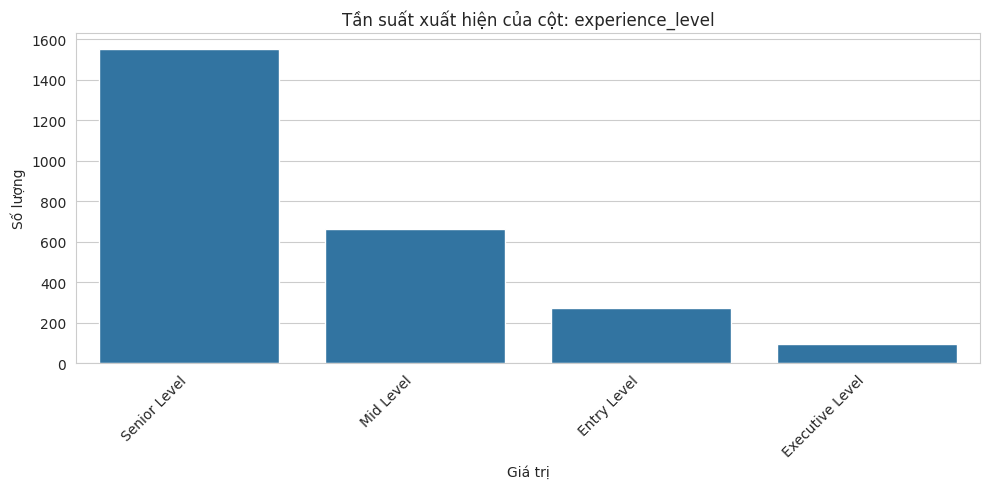

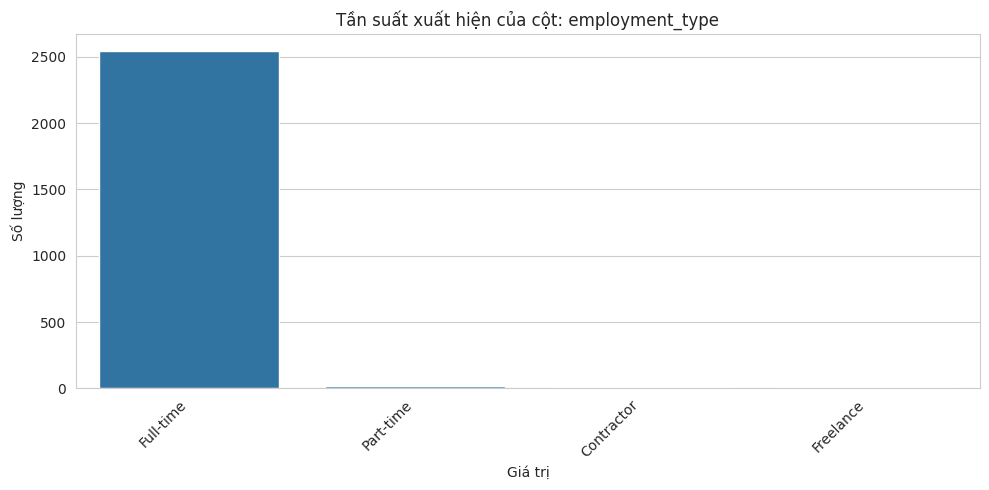

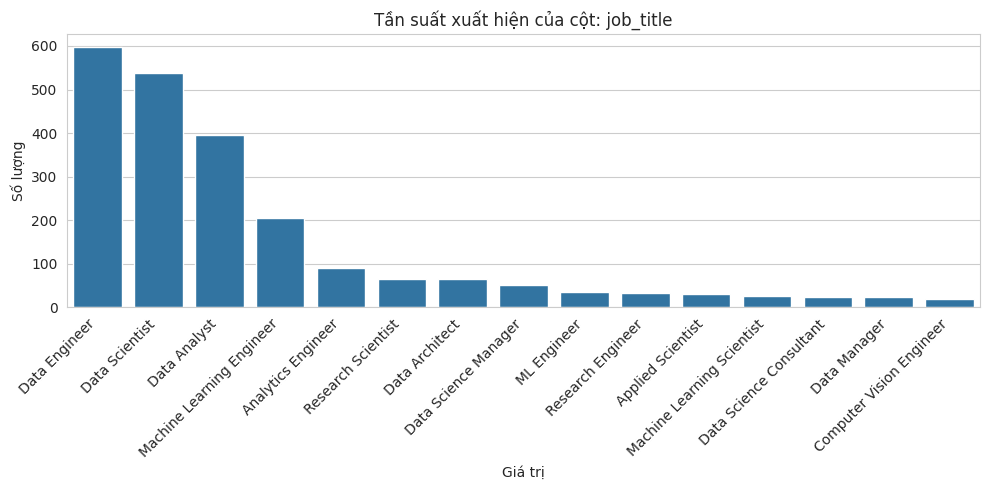

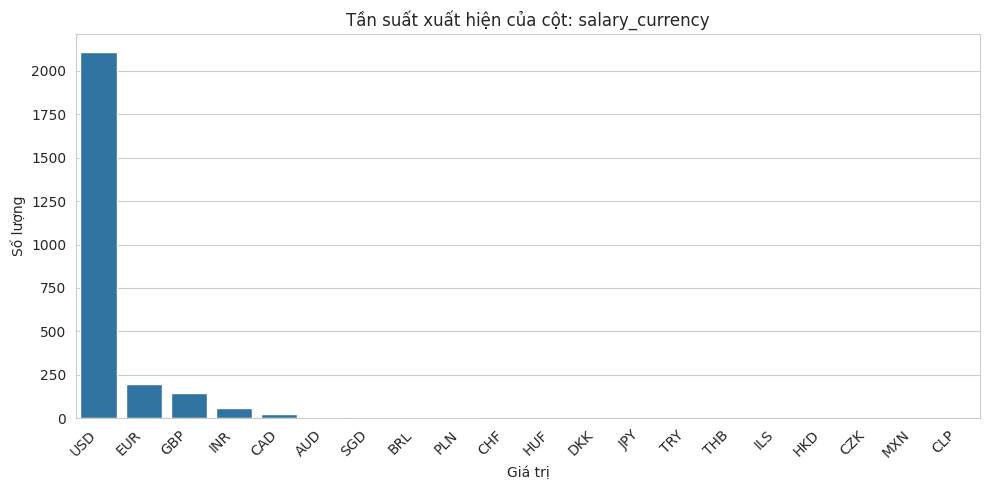

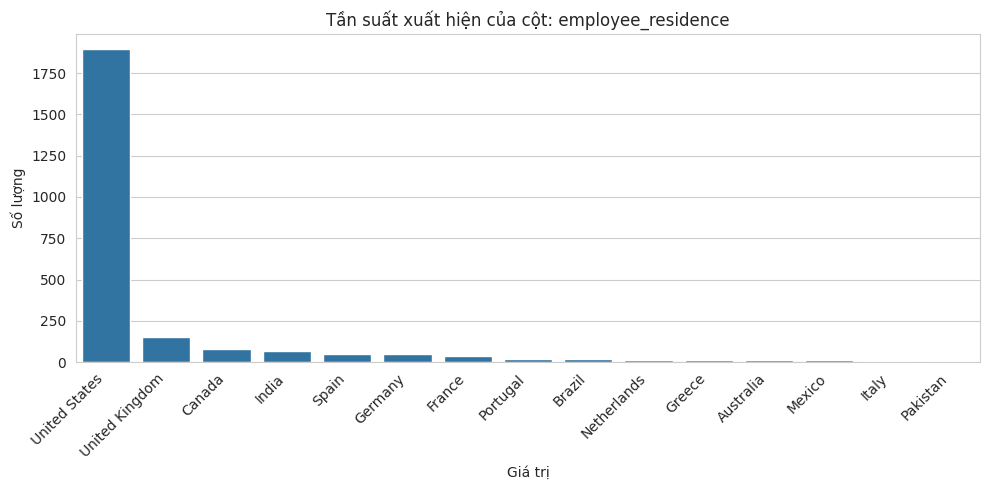

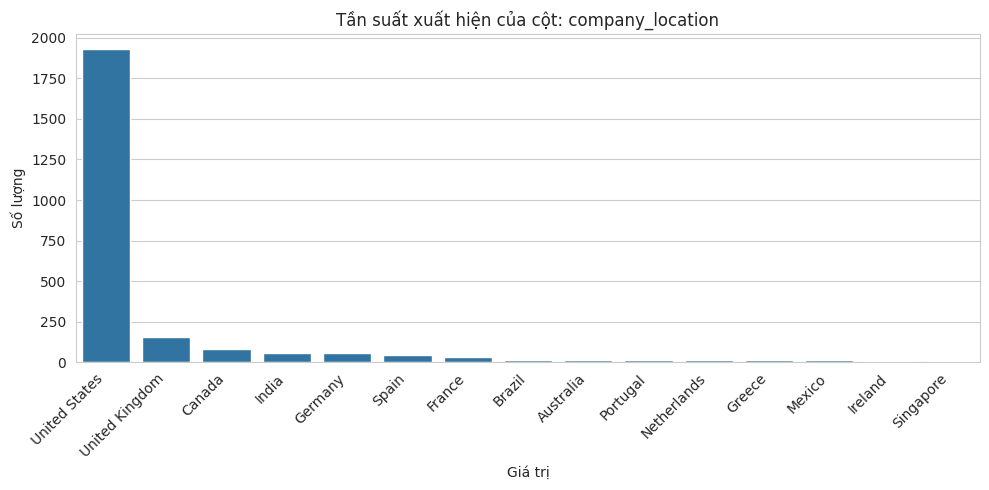

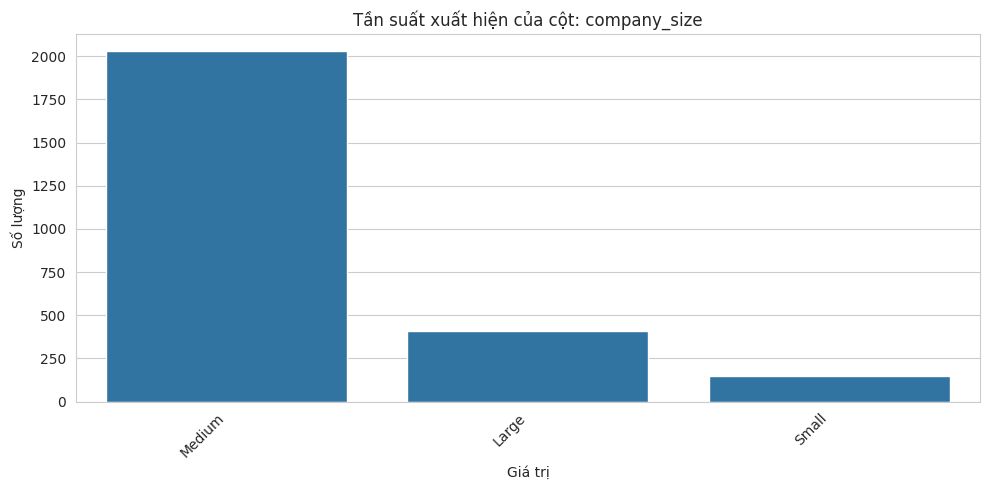

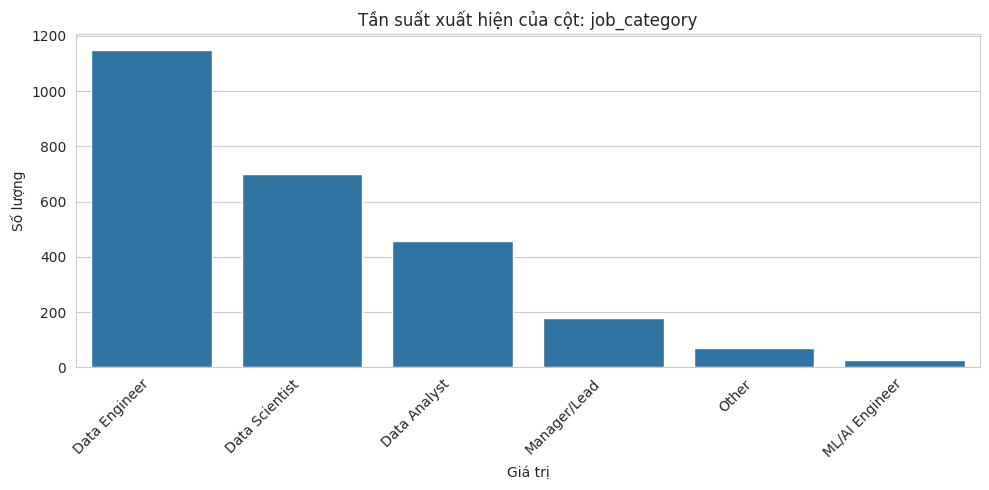

In [19]:
# Vẽ biểu đồ cho từng cột
for col in cat_cols:
    # Nếu số nhãn lớn, chỉ hiển thị top 15 để dễ nhìn
    if df[col].nunique() > 20:
        vis.plot_bar_count(df, col, top_n=15)
    else:
        vis.plot_bar_count(df, col)

Sử dụng *Treemap* thay vì Bar chart đơn giản đối với **experience_level** để thấy rõ tỷ trọng


In [20]:
temp_df = df['experience_level'].value_counts().reset_index()
temp_df.columns = ['Experience Level', 'Count']

fig = px.treemap(temp_df, path=['Experience Level'], values='Count',
                 title='Phân bố nhân sự theo Cấp độ kinh nghiệm',
                 color='Count', color_continuous_scale='RdBu')
fig.show()

Tạo *WordCloud* để thấy các từ khóa phổ biến trong chức danh (**job_title**)


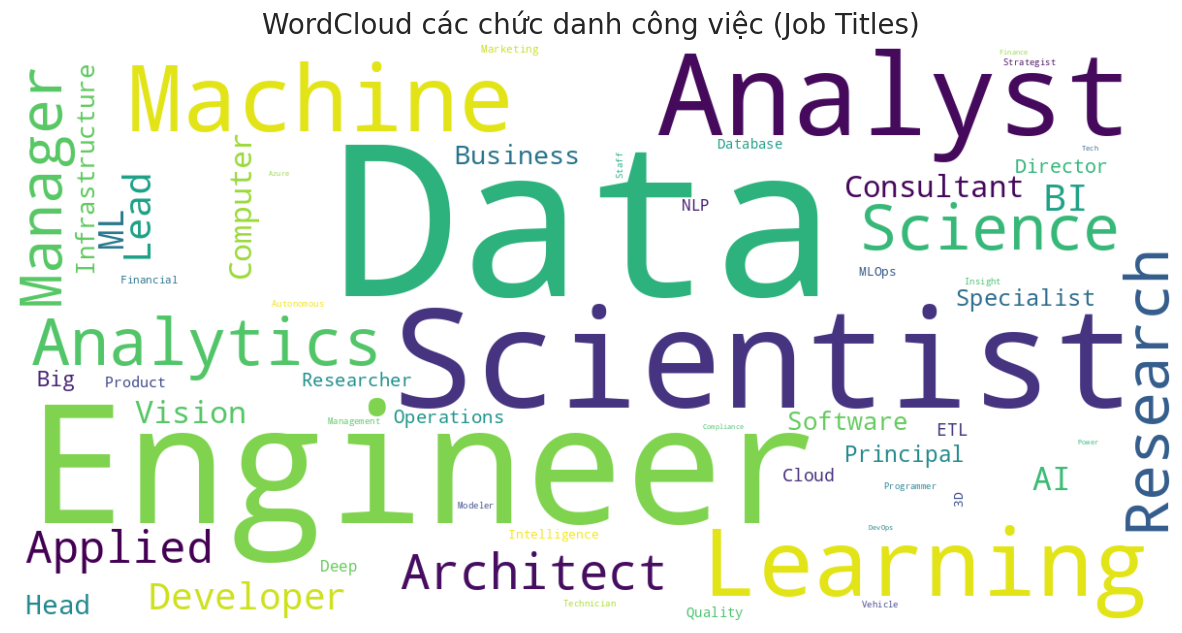

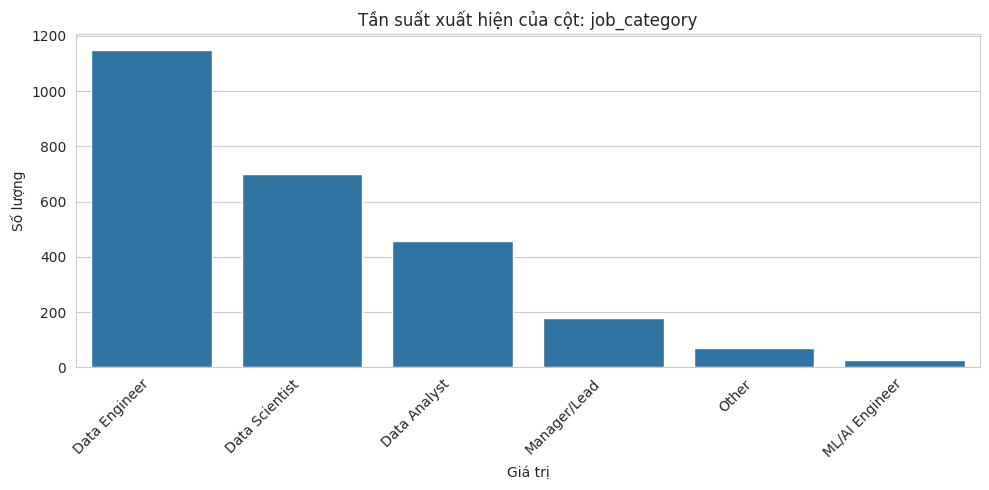

In [22]:
text = " ".join(title for title in df.job_title)
word_cloud = WordCloud(collocations=False, background_color='white', width=1200, height=600).generate(text)

plt.figure(figsize=(15,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud các chức danh công việc (Job Titles)", fontsize=20)
plt.show()

# Vẽ thêm Bar chart cho Job Category mới tạo
vis.plot_bar_count(df, 'job_category')

## **2.4. Phân tích dữ liệu bị thiếu**

**Kiểm tra missing value:** 

In [23]:
print("=== Missing Values ===")
missing_values = df[cat_cols].isnull().sum()
print(missing_values[missing_values > 0] if missing_values.any() else "Không có missing value.")

=== Missing Values ===
Không có missing value.


## **2.5. Mối quan hệ & Tương quan**

**Tương quan giữa các biến số**

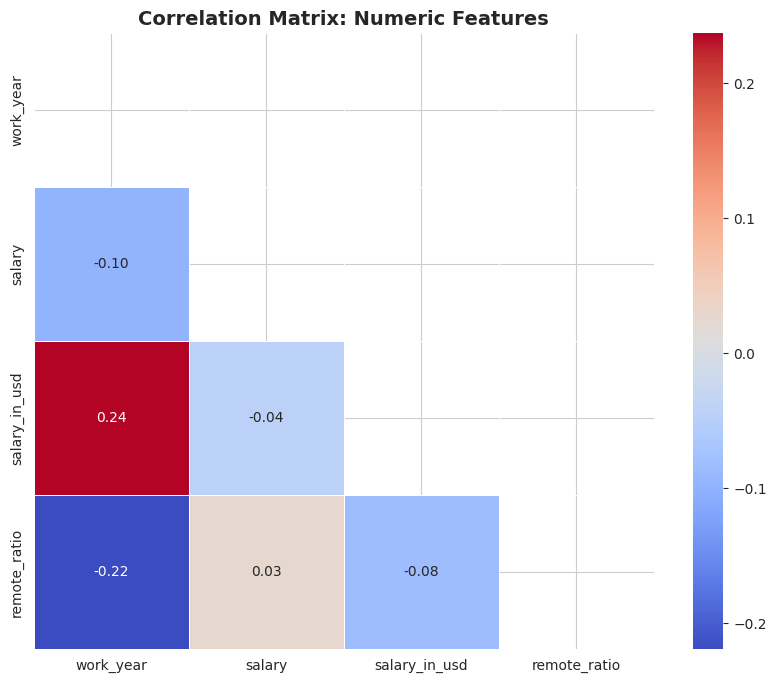

In [24]:
# Tương quan giữa work_year, salary_in_usd, remote_ratio
vis.plot_correlation_heatmap(df, title="Correlation Matrix: Numeric Features")

**Quan hệ giữa Kinh nghiệm (experience_level) và Mức lương (salary_in_usd)**

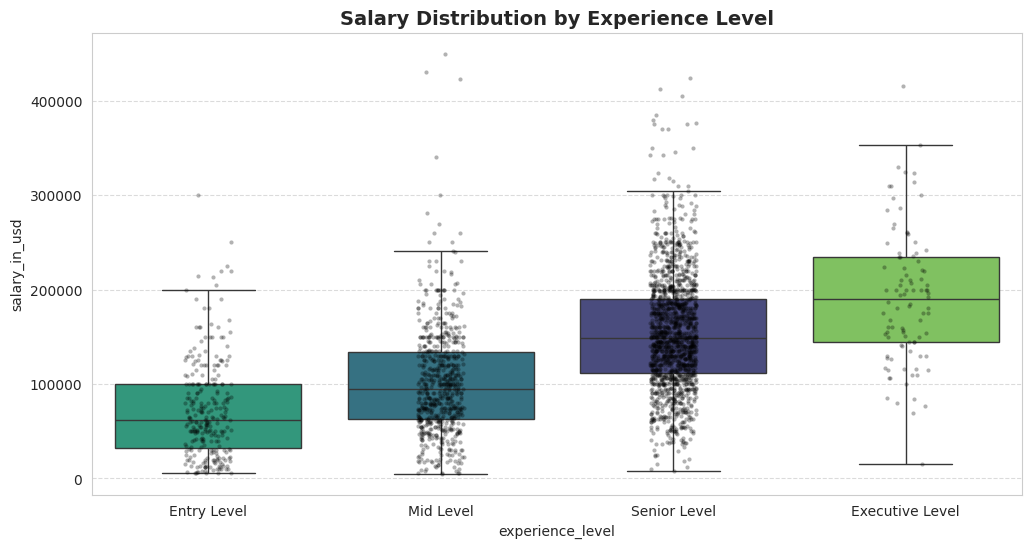

In [27]:
# Thứ tự logic: Entry -> Mid -> Senior -> Executive (EN -> MI -> SE -> EX)
exp_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
vis.plot_categorical_vs_numerical_box(
    df, 
    cat_col='experience_level', 
    num_col='salary_in_usd', 
    order=exp_order,
    title="Salary Distribution by Experience Level"
)

**Quan hệ giữa Quy mô công ty (company_size) và Mức lương (salary_in_usd)**

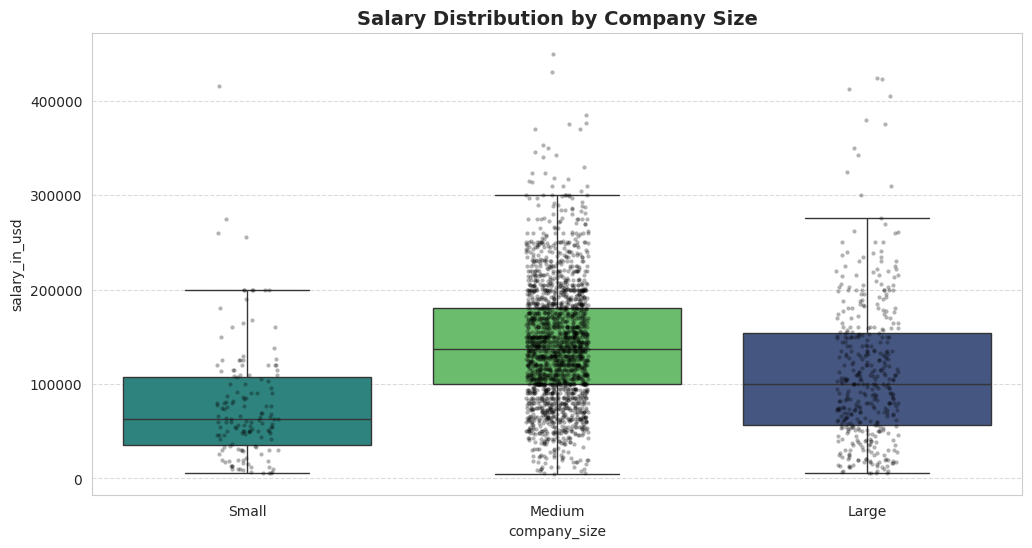

In [29]:
# Thứ tự logic: Small -> Medium -> Large
size_order = ['Small', 'Medium', 'Large']
vis.plot_categorical_vs_numerical_box(
    df, 
    cat_col='company_size', 
    num_col='salary_in_usd', 
    order=size_order,
    title="Salary Distribution by Company Size"
)

**Quan hệ giữa Tỷ lệ làm việc từ xa (remote_ratio) và Mức lương (salary_in_usd)**

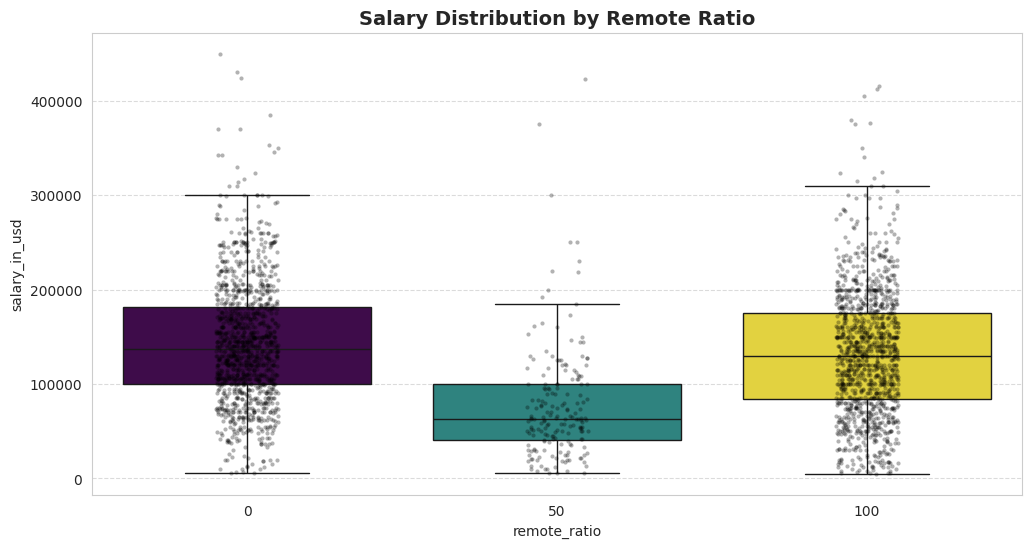

In [30]:
# Remote ratio thực chất là phân loại (0, 50, 100)
vis.plot_categorical_vs_numerical_box(
    df, 
    cat_col='remote_ratio', 
    num_col='salary_in_usd',
    title="Salary Distribution by Remote Ratio"
)

**Quan hệ giữa các biến phân loại**

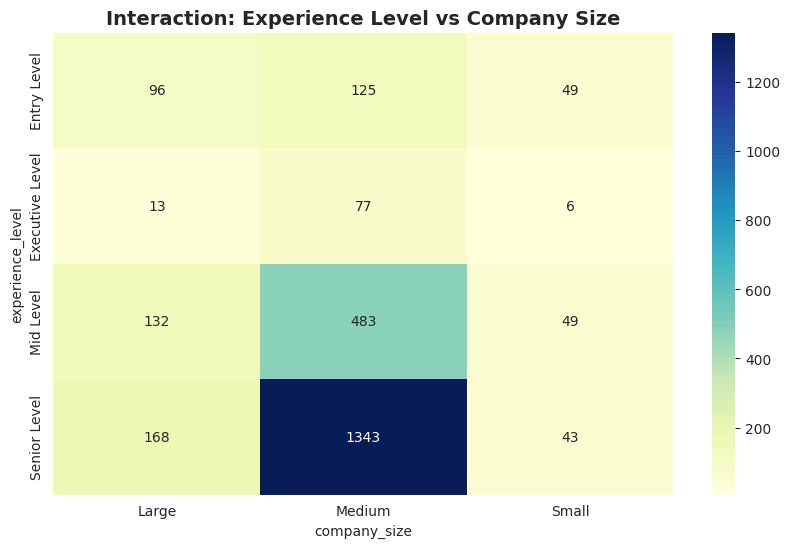

In [31]:
# Kiểm tra xem Nhân viên ở các cấp độ kinh nghiệm thường làm ở công ty quy mô nào?
vis.plot_categorical_heatmap(
    df, 
    col1='experience_level', 
    col2='company_size', 
    title="Interaction: Experience Level vs Company Size"
)

**Nhận xét**:

* **Tương quan cột số:** Có sự tương quan dương (0.24) giữa `work_year` và `salary_in_usd`, cho thấy xu hướng lương tăng dần theo thời gian (2020-2023).
* **Kinh nghiệm:** Phân cấp lương rõ rệt theo quy luật `EN < MI < SE < EX`. Nhóm Senior (`SE`) chiếm số lượng áp đảo và có dải lương biến động mạnh nhất.
* **Quy mô công ty:** Trái với suy nghĩ thông thường, công ty quy mô vừa (**M**) có mức lương trung vị ngang bằng hoặc nhỉnh hơn công ty lớn (**L**), trong khi công ty nhỏ (**S**) thấp nhất.
* **Làm việc từ xa:** Không có quan hệ tuyến tính. Nhóm làm từ xa hoàn toàn (100%) có lương cạnh tranh ngang ngửa nhóm tại văn phòng (0%), trong khi nhóm Hybrid (50%) lại có mức lương thấp nhất.

**Kết luận:** Dữ liệu có tiềm năng dự báo tốt nhưng chứa các yếu tố phi tuyến tính. Cần thực hiện **Feature Engineering** (gom nhóm chức danh, chỉnh lạm phát) để chuẩn bị cho mô hình huấn luyện.

### Phân tích Địa lý 
sử dụng bản đồ nhiệt (*Choropleth Map*) để quan sát sự phân bố mức lương trung bình trên toàn thế giới. Điều này giúp trả lời câu hỏi: **"Quốc gia nào trả lương cao nhất cho nhân sự ngành Data?"**

In [32]:
# Tính mức lương trung bình theo quốc gia công ty
country_salary = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Vẽ bản đồ
fig = px.choropleth(country_salary,
                    locations='company_location',
                    locationmode='country names',
                    color='salary_in_usd',
                    color_continuous_scale='Viridis',
                    title='Mức lương trung bình theo Vị trí Công ty (Global Heatmap)',
                    labels={'salary_in_usd': 'Avg Salary (USD)'})
fig.show()

/tmp/ipykernel_31449/2600284951.py:5: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



### Xu hướng làm việc từ xa (Remote Work) thay đổi thế nào qua các năm?
Sử dụng **Radar Chart** để so sánh tỷ lệ các loại hình làm việc (On-site, Hybrid, Remote) thay đổi như thế nào từ năm 2020 đến 2023.

In [33]:
# Tạo bảng tổng hợp
remote_year = df.groupby(['work_year', 'remote_ratio']).size().reset_index(name='count')
# Pivot để có data vẽ
pivot_remote = remote_year.pivot(index='remote_ratio', columns='work_year', values='count').fillna(0)

# Chuẩn hóa về tỷ lệ %
pivot_remote_pct = pivot_remote.div(pivot_remote.sum(axis=0), axis=1) * 100

categories = pivot_remote_pct.index.tolist()
fig = go.Figure()

for year in pivot_remote_pct.columns:
    fig.add_trace(go.Scatterpolar(
        r=pivot_remote_pct[year].values,
        theta=categories,
        fill='toself',
        name=str(year)
    ))

fig.update_layout(
  polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
  showlegend=True,
  title="Sự thay đổi xu hướng làm việc từ xa (2020 - 2023)"
)
fig.show()

### Mối quan hệ giữa Job Category, Experience Level và Mức lương
Chúng ta sử dụng **Heatmap** để tìm ra "điểm nóng" thu nhập. Trục tung là các nhóm công việc, trục hoành là cấp độ kinh nghiệm. Màu sắc càng đậm thể hiện mức lương trung vị càng cao.

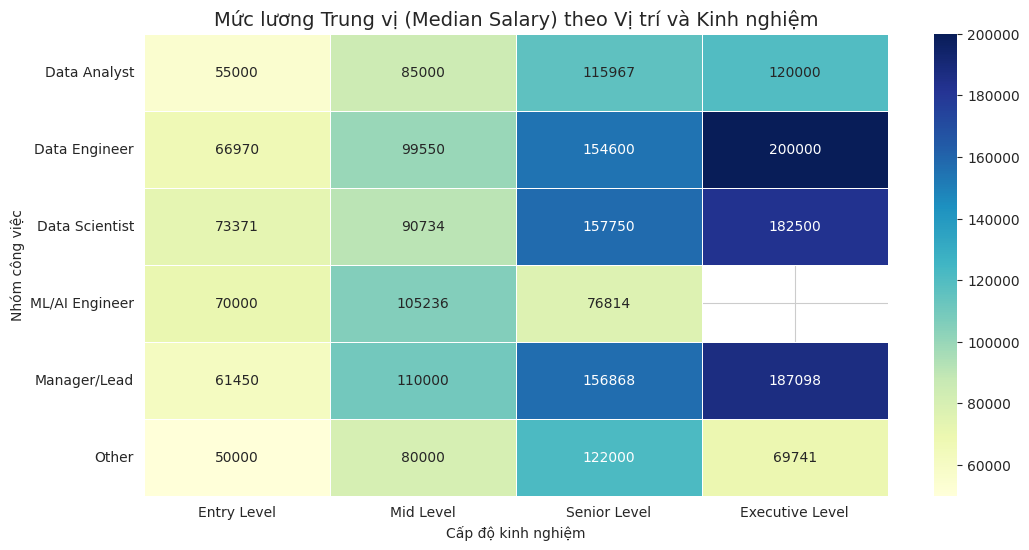

In [34]:
# Tính lương trung vị cho từng cặp (Job Category, Experience Level)
pivot_salary = df.pivot_table(values='salary_in_usd',
                              index='job_category',
                              columns='experience_level',
                              aggfunc='median')

# Sắp xếp lại thứ tự cột cho logic
cols_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
pivot_salary = pivot_salary[cols_order]

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_salary, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Mức lương Trung vị (Median Salary) theo Vị trí và Kinh nghiệm', fontsize=14)
plt.ylabel('Nhóm công việc')
plt.xlabel('Cấp độ kinh nghiệm')
plt.show()

## **2.6. Quan sát & Nhận định ban đầu**
**Tóm tắt:**
*   *3-5 quan sát chính*
*   *Các vấn đề chất lượng dữ liệu đã xác định*
*   *Các bước tiền xử lý cần thiết*
*   *Các mẫu thú vị dẫn đến câu hỏi nghiên cứu*

**Cờ đỏ (Red Flags):**
*   *Các lo ngại nghiêm trọng về chất lượng dữ liệu*
*   *Các hạn chế*

---

# **3. Đặt câu hỏi**
Xác định 2 × n câu hỏi ý nghĩa (với n là số thành viên nhóm). Ít nhất 1 câu hỏi phải yêu cầu xây dựng mô hình Machine Learning.

**Danh sách câu hỏi:**
1.  ...
2.  ...
3.  ...
4.  ...
5.  ...
6.  ...

---

# **4. Phân tích dữ liệu**
Đối với mỗi câu hỏi nghiên cứu, hãy hoàn thành các bước sau.

#### Câu hỏi 1: [Nhập câu hỏi tại đây]

**1. Câu hỏi:**
*Nêu rõ câu hỏi nghiên cứu một cách cụ thể.*

**2. Động lực & Lợi ích:**
*Tại sao câu hỏi này đáng để điều tra? Ai quan tâm? Nó mang lại thông tin gì?*

**A. Tiền xử lý (nếu cần)**
*   *Mô tả các bước rõ ràng*
*   *Giải thích logic*
*   *Triển khai code*

In [35]:
# Code tiền xử lý cho Câu hỏi 1


**B. Phân tích**
*   *Mô tả phương pháp phân tích*
*   *Giải thích tại sao dùng phương pháp đó*
*   *Triển khai code (ngắn gọn, dễ đọc, có chú thích)*
*   *(Đối với ML: Giải thích thiết lập, mô hình, đánh giá)*

In [36]:
# Code phân tích cho Câu hỏi 1


**C. Kết quả & Diễn giải**
*   *Trực quan hóa (2+ biểu đồ liên quan)*
*   *Phân tích bằng văn bản (Trả lời rõ ràng với bằng chứng, trích dẫn số liệu, thảo luận ý nghĩa)*

In [37]:
# Code trực quan hóa cho Câu hỏi 1


#### Câu hỏi 2: [Nhập câu hỏi tại đây]

*(Lặp lại cấu trúc: Câu hỏi, Động lực, Tiền xử lý, Phân tích, Kết quả)*

*(Lặp lại cho các câu hỏi còn lại...)*

---

# **5. Tổng kết**

### Tóm tắt dự án
**Những phát hiện chính:**
*   *Liệt kê 3-5 thông tin chi tiết quan trọng nhất*
*   *Nêu bật phát hiện thú vị nhất*

### Hạn chế
*   *Hạn chế về dữ liệu (kích thước mẫu, bias)*
*   *Hạn chế về phân tích*
*   *Hạn chế về phạm vi*

### Hướng phát triển trong tương lai
*   *Các câu hỏi bổ sung để khám phá*
*   *Cơ hội phân tích sâu hơn*
*   *Các phương pháp thay thế*

### Suy ngẫm cá nhân
**Thành viên 1:**
*   *Khó khăn & Thử thách*
*   *Bài học & Tăng trưởng*

**Thành viên 2:**
*   *Khó khăn & Thử thách*
*   *Bài học & Tăng trưởng*

**Thành viên 3:**
*   *Khó khăn & Thử thách*
*   *Bài học & Tăng trưởng*